In [1]:
import datetime
import numpy as np
import pandas as pd
%matplotlib inline
import pandas_datareader.data as web
import fix_yahoo_finance as yf
import math

In [2]:
start = datetime.datetime(2013,1,1)
end = datetime.datetime(2018,9,23)
df = web.DataReader(['ACLS'],'yahoo',start,end)['Adj Close']

In [126]:
df.columns = ['Price']

In [127]:
def reversion(df):
    df['Log Price'] = df['Price'].apply(lambda x:math.log(x))
    df['Normal Return'] = df['Price'].pct_change()
    df['Log Return'] = df['Normal Return'].apply(lambda x:math.log(x+1))
    df['180day MA'] = df['Price'].rolling(180).mean()
    df['30day MA'] = df['Price'].rolling(30).mean()
    df['Long Signal'] = np.where(df['30day MA'] < df['180day MA'],1,0)
    df['Short Signal'] = np.where(df['30day MA'] > df['180day MA'],1,0)
    df['Strat Daily Return'] = np.where((df['Long Signal'] == 1)&(df['Short Signal'] == 0),df['Log Return'],
                                        np.where((df['Long Signal'] == 0)&(df['Short Signal'] == 1), -df['Log Return'],0))
    df['Cumulative Sum'] = df['Strat Daily Return'].cumsum()
    return df

In [128]:
reversion(df)

,Price,Log Price,Normal Return,Log Return,180day MA,30day MA,Long Signal,Short Signal,Strat Daily Return,Cumulative Sum
Date,,,,,,,,,,
2013-01-02,5.480000,1.701105,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000
2013-01-03,5.560000,1.715598,0.014599,0.014493,NaN,NaN,0,0,0.000000,0.000000
2013-01-04,5.560000,1.715598,0.000000,0.000000,NaN,NaN,0,0,0.000000,0.000000
2013-01-07,5.640000,1.729884,0.014388,0.014286,NaN,NaN,0,0,0.000000,0.000000
2013-01-08,5.480000,1.701105,-0.028369,-0.028779,NaN,NaN,0,0,0.000000,0.000000
2013-01-09,5.520000,1.708378,0.007299,0.007273,NaN,NaN,0,0,0.000000,0.000000
2013-01-10,5.440000,1.693779,-0.014493,-0.014599,NaN,NaN,0,0,0.000000,0.000000
2013-01-11,5.440000,1.693779,0.000000,0.000000,NaN,NaN,0,0,0.000000,0.000000
2013-01-14,5.240000,1.656321,-0.036765,-0.037458,NaN,NaN,0,0,0.000000,0.000000


In [129]:
reversion(df)

,Price,Log Price,Normal Return,Log Return,180day MA,30day MA,Long Signal,Short Signal,Strat Daily Return,Cumulative Sum
Date,,,,,,,,,,
2013-01-02,5.480000,1.701105,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000
2013-01-03,5.560000,1.715598,0.014599,0.014493,NaN,NaN,0,0,0.000000,0.000000
2013-01-04,5.560000,1.715598,0.000000,0.000000,NaN,NaN,0,0,0.000000,0.000000
2013-01-07,5.640000,1.729884,0.014388,0.014286,NaN,NaN,0,0,0.000000,0.000000
2013-01-08,5.480000,1.701105,-0.028369,-0.028779,NaN,NaN,0,0,0.000000,0.000000
2013-01-09,5.520000,1.708378,0.007299,0.007273,NaN,NaN,0,0,0.000000,0.000000
2013-01-10,5.440000,1.693779,-0.014493,-0.014599,NaN,NaN,0,0,0.000000,0.000000
2013-01-11,5.440000,1.693779,0.000000,0.000000,NaN,NaN,0,0,0.000000,0.000000
2013-01-14,5.240000,1.656321,-0.036765,-0.037458,NaN,NaN,0,0,0.000000,0.000000


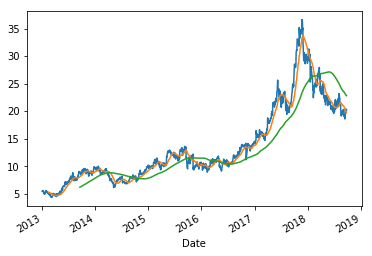

In [130]:
%matplotlib inline
df['Price'].plot()
df['30day MA'].plot()
df['180day MA'].plot()

In [131]:
df['Normal Return'].sum()

1.889154426501225

In [132]:
x = df['Log Return'].sum()
math.exp(x) - 1

2.6952554615909703